## <font color = "#CC3D3D">Case #1: Binarization</font>

<hr>

### Step #1: What is binarization of image?
<hr>

- 영상의 이진화
    - 영상의 픽셀 값을 0 또는 255(1)로 만드는 연산
        - 배경 vs 객체
        - 관심 영역 vs 비관심 영역

- retval : 사용하지 않으려면 _, dst = cv2.threshold(parameter) 형태로 변수 할당

In [ ]:
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/cells.png", cv2.IMREAD_GRAYSCALE)

T1, destination1 = cv2.threshold(source, 80, 255, cv2.THRESH_BINARY)
T2, destination2 = cv2.threshold(source, 210, 255, cv2.THRESH_BINARY)

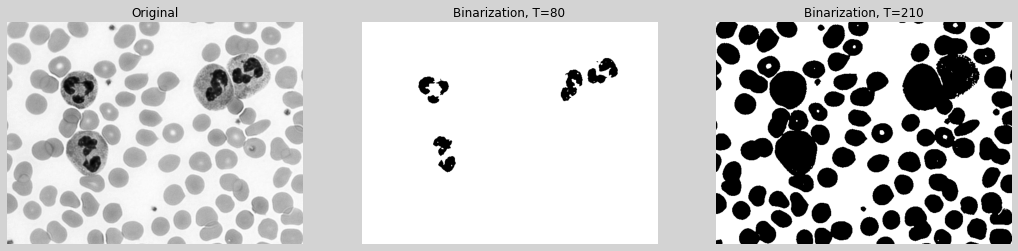

-1

In [90]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(131, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(132, title=f"Binarization, T={int(T1)}").axis("off")
plt.imshow(destination1, "gray")

plt.subplot(133, title=f"Binarization, T={int(T2)}").axis("off")
plt.imshow(destination2, "gray")

plt.show()

In [ ]:
# 트랙바 사용
def on_threshold(value):
    _, result = cv2.threshold(
        src=source,
        thresh=value,
        maxval=255,
        type=cv2.THRESH_BINARY
        )
    cv2.imshow("Binarization", result)

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.namedWindow("Binarization")
cv2.createTrackbar("Threshold", "Binarization", 210, 255, on_threshold)
on_threshold(210)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #2: Automatic Binarization</font>

<hr>

### Step #1: How to automatic binarization
<hr>



<hr>

### Step #2: implementation example
<hr>

In [ ]:
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/rice.png", cv2.IMREAD_GRAYSCALE)

# or 연산자를 통해 cv2.THRESH_BINARY 플래그를 지정하지 않아도 있다고 가정한다.
# 한편, inverse된 이진화 영상을 얻고 싶으면 cv2.THRESH_BINARY_INV 플래그를 or 연산자로 묶어서 지정하면 된다.
value, destination = cv2.threshold(source, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("otsu's threshold:", value)

otsu's threshold: 131.0


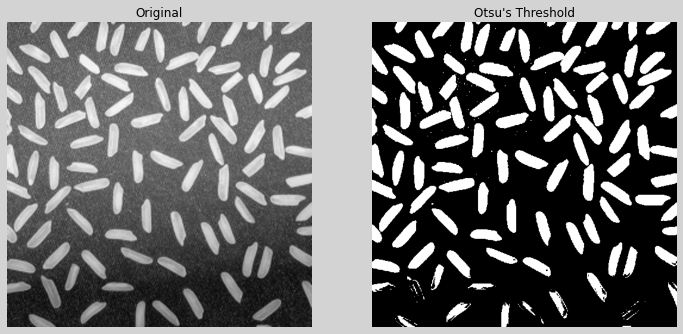

-1

In [91]:
# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Otsu's Threshold").axis("off")
plt.imshow(destination, "gray")

plt.show()

#### NOTE: 조명이 뷸균일하여 영상의 하단 부분은 이진화가 정확하게 되지 않는 모습을 볼 수 있다.

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Otsu's Threshold", destination)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## <font color = "#CC3D3D">Case #3: Local Binarization</font>

전체 영상을 균일한 크기로 n등분. 각각의 구역마다 따로 이진화를 구현하고 이어 붙인다.
윈도우 형태 
    - 유니폼: 부분영상 전체를 같은 가중치로 계산
    - 가우시안: 2D 가우시안 그래프 형태로 중앙 부근은 높은 가중치, 중앙에서 멀어질수록 낮은 가중치


<hr>

### Step #2: Manually implementation example
<hr>

In [107]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/rice.png", cv2.IMREAD_GRAYSCALE)


# 입력 영상을 가로 4 세로 4 총 16 등분하여 각각 이진화
def local_binarization(image, value):
    result = np.zeros(image.shape, np.uint8)
    
    block_width = image.shape[1] // value
    block_height = image.shape[0] // value
    
    for y in range(value):
        for x in range(value):
            image_ = image[
                y * block_height:(y+1) * block_height,  # rows
                x * block_width:(x+1) * block_width     # cols
                ]
            result_ = result[
                y * block_height:(y+1) * block_height,  # rows
                x * block_width:(x+1) * block_width     # cols
                ]
            cv2.threshold(image_, 0, 255, cv2.THRESH_OTSU, result_)

    print("Local Binarization is done!")
    return result


destination = local_binarization(source, 4)

Local Binarization is done!


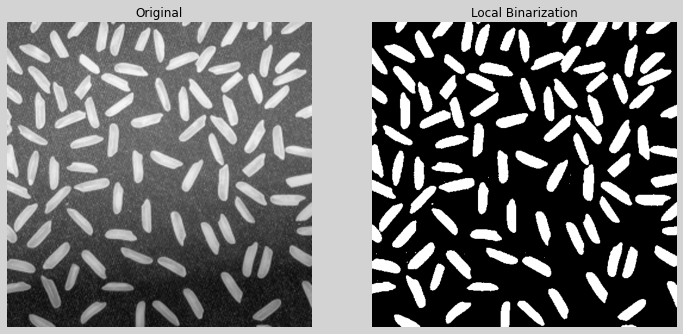

In [102]:
# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Local Binarization").axis("off")
plt.imshow(destination, "gray")

plt.show()

In [103]:
# 트랙바 사용하기
def on_trackbar(value):
    if value == 0:
        value = 1
    elif value > 1 and value % 2:
        value -= 1
    
    # 입력 영상을 가로, 세로 value 만큼 총 value x value 등분하여 각각 이진화
    destination = local_binarization(source, value)
    
    cv2.imshow("Local Binarization", destination)

In [104]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.namedWindow("Local Binarization")
cv2.createTrackbar("window ratio", "Local Binarization", 4, 20, on_trackbar)
on_trackbar(4)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<hr>

### Step #2-1: function implementation example
<hr>

In [ ]:
import cv2
import numpy as np

source = cv2.imread("images/sudoku.jpg", cv2.IMREAD_GRAYSCALE)

destination = cv2.adaptiveThreshold(
        src=source,
        maxValue=255,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY,
        blockSize=91,
        C=5
        )

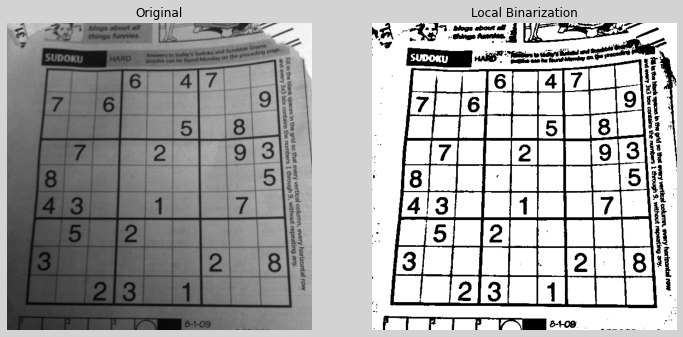

In [98]:
# pyplot으로 출력
plt.figure(figsize=(12, 6), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Local Binarization").axis("off")
plt.imshow(destination, "gray")

plt.show()

In [ ]:
# 트랙바 사용하기
def on_trackbar(value):
    block_size = 3 if value < 3 else value if value % 2 else value - 1
    
    destination = cv2.adaptiveThreshold(
        source, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, 5
        )
    
    cv2.imshow("Local Binarization", destination)

In [79]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.namedWindow("Local Binarization")
cv2.createTrackbar("block size", "Local Binarization", 5, 100, on_trackbar)
on_trackbar(5)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## <font color = "#CC3D3D">Case #4: Morphology</font>

3x3 정방형 행렬이 가장 많이 쓰인다.

In [99]:
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("images/circuit1.bmp", cv2.IMREAD_GRAYSCALE)

structur = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
destination1 = cv2.erode(source, structur)

structur = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 7))
destination2 = cv2.dilate(source, structur)

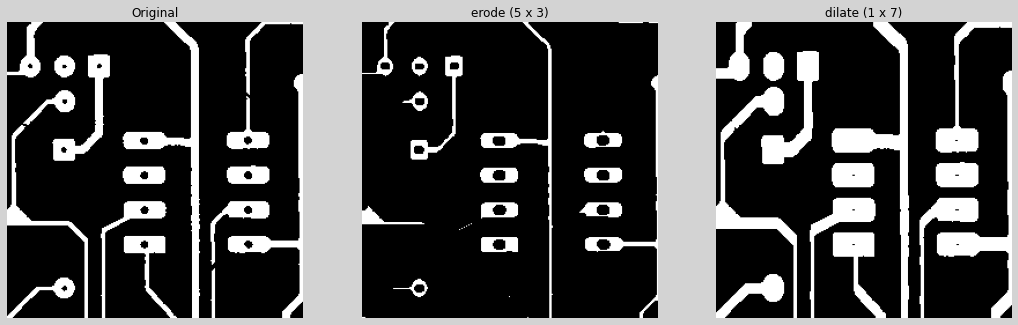

In [100]:
# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(131, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(132, title="erode (5 x 3)").axis("off")
plt.imshow(destination1, "gray")

plt.subplot(133, title="dilate (1 x 7)").axis("off")
plt.imshow(destination2, "gray")

plt.show()

In [ ]:
# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("erode (5 x 3)", destination1)
cv2.imshow("dilate (1 x 7)", destination2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Step #?: opening & closing
<hr>

## <font color = "#CC3D3D">Case #5: Labeling</font>